In [179]:
import numpy as np
import pandas as pd
import seaborn as sns

import matplotlib.pyplot as plt
%matplotlib inline

In [180]:
df = pd.read_csv('D:/video_games_sales.csv')
df.head()

,rank,name,platform,year,genre,publisher,na_sales,eu_sales,jp_sales,other_sales,global_sales
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37


In [181]:
df.shape

(16598, 11)

In [182]:
df.dtypes

rank              int64
name             object
platform         object
year            float64
genre            object
publisher        object
na_sales        float64
eu_sales        float64
jp_sales        float64
other_sales     float64
global_sales    float64
dtype: object

### 1. Добавлене нового атрибута
Добавим столбец - отношение продаж в Японии к продажам в Северной Америке. Таким образом узнаем какие игры популярнее в Азии, а какие больше нравятся американцам 
- [na_vs_jp].


In [183]:
df = df.assign(na_vs_jp = df.na_sales  /  df.jp_sales)
df

,rank,name,platform,year,genre,publisher,na_sales,eu_sales,jp_sales,other_sales,global_sales,na_vs_jp
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74,11.005305
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24,4.270191
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82,4.182058
3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00,4.801829
4,5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37,1.102740
...,...,...,...,...,...,...,...,...,...,...,...,...
16593,16596,Woody Woodpecker in Crazy Castle 5,GBA,2002.0,Platform,Kemco,0.01,0.00,0.00,0.00,0.01,inf
16594,16597,Men in Black II: Alien Escape,GC,2003.0,Shooter,Infogrames,0.01,0.00,0.00,0.00,0.01,inf
16595,16598,SCORE International Baja 1000: The Official Game,PS2,2008.0,Racing,Activision,0.00,0.00,0.00,0.00,0.01,NaN
16596,16599,Know How 2,DS,2010.0,Puzzle,7G//AMES,0.00,0.01,0.00,0.00,0.01,NaN


Сразу можно заметить,что появляется много пустых или нулевых значений в новом столбце. Можно убедиться в этом, посмотрев тепловую карту пропущенных значений. 

<AxesSubplot:>

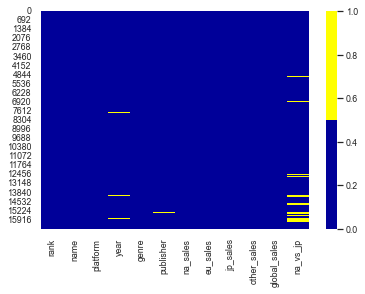

In [184]:
cols = df.columns[:15] # первые 15 колонок
# определяем цвета 
# желтый - пропущенные данные, синий - не пропущенные
colours = ['#000099', '#ffff00'] 
sns.heatmap(df[cols].isnull(), cmap=sns.color_palette(colours))

In [185]:
df.size

199176

### 2. "Причешем" датасет
Удалим выбросы и дубли, обработем пропущенные значения.
Подсчитаем количество дубликатов, если они есть, и удалим их

In [186]:
quantity_rows_before_deletion = df.shape[0]
df.drop_duplicates()
quantity_rows_after_deletion = df.shape[0]
if quantity_rows_before_deletion == quantity_rows_after_deletion:
    print("Дубликатов не найдено")
else:
    print(f"Количество удаленных дубликатов {quantity_rows_after_deletion - quantity_rows_before_deletion}")

Дубликатов не найдено


Исходя из тепловой карты видно, что есть пропуски в добавленном атрибуте. Это обусловлено тем, что по некоторым играм не зафиксированы продажи в Северной Америке или Японии. Такие записи можно дозаполнить вручную нулями.

In [187]:
df['na_vs_jp'] = df['na_vs_jp'].fillna(0)

<AxesSubplot:>

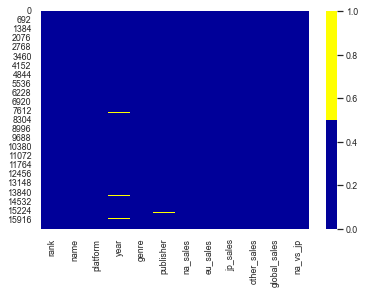

In [188]:
cols = df.columns[:15] # первые 15 колонок
# определяем цвета 
# желтый - пропущенные данные, синий - не пропущенные
colours = ['#000099', '#ffff00'] 
sns.heatmap(df[cols].isnull(), cmap=sns.color_palette(colours))

Также мы имеем пропуски в поле "year", и, так как мы не имеем данных о дате выпуска игр, то просто удалим записи с неуказанным годом.

In [189]:
df = df.dropna(subset=['year']) #удаление NaN в в определенных столбцах
df


,rank,name,platform,year,genre,publisher,na_sales,eu_sales,jp_sales,other_sales,global_sales,na_vs_jp
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74,11.005305
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24,4.270191
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82,4.182058
3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00,4.801829
4,5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37,1.102740
...,...,...,...,...,...,...,...,...,...,...,...,...
16593,16596,Woody Woodpecker in Crazy Castle 5,GBA,2002.0,Platform,Kemco,0.01,0.00,0.00,0.00,0.01,inf
16594,16597,Men in Black II: Alien Escape,GC,2003.0,Shooter,Infogrames,0.01,0.00,0.00,0.00,0.01,inf
16595,16598,SCORE International Baja 1000: The Official Game,PS2,2008.0,Racing,Activision,0.00,0.00,0.00,0.00,0.01,0.000000
16596,16599,Know How 2,DS,2010.0,Puzzle,7G//AMES,0.00,0.01,0.00,0.00,0.01,0.000000


Снова построим тепловую карту, чтобы понять сколько пустых значений еще осталось

<AxesSubplot:>

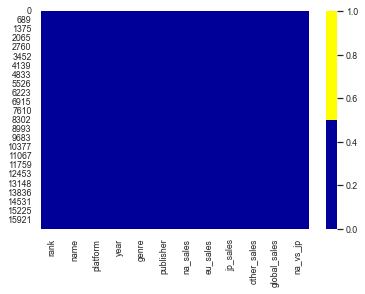

In [190]:
cols = df.columns[:15] # первые 15 колонок
# определяем цвета 
# желтый - пропущенные данные, синий - не пропущенные
colours = ['#000099', '#ffff00'] 
sns.heatmap(df[cols].isnull(), cmap=sns.color_palette(colours))

### 3-4. Графики зависимости, кластеризация
Построим графики зависимости одной переменной от другой (plt.scatter), опишем кластеры (kMeans). Построим несколько разных графиков.

In [191]:
df.nunique ()

rank            16327
name            11360
platform           31
year               39
genre              12
publisher         576
na_sales          408
eu_sales          305
jp_sales          244
other_sales       157
global_sales      621
na_vs_jp         1423
dtype: int64

In [192]:
df.genre.unique()

array(['Sports', 'Platform', 'Racing', 'Role-Playing', 'Puzzle', 'Misc',
       'Shooter', 'Simulation', 'Action', 'Fighting', 'Adventure',
       'Strategy'], dtype=object)

Определим наиболее часто встречающиеся жанры, чтобы сократить выборку для анализа. При этом лучше взять жанры, которых встречается одинаковое кол-во раз. Такими жанрами стали шутеры, приключенческие игры и гонки. Возьмем за основу имеено эти жанры. Уберем лишние для анализа

In [193]:
df['genre'].value_counts()

Action          3253
Sports          2304
Misc            1710
Role-Playing    1471
Shooter         1282
Adventure       1276
Racing          1226
Platform         876
Simulation       851
Fighting         836
Strategy         671
Puzzle           571
Name: genre, dtype: int64

In [194]:
#define values
values = ['Shooter', 'Adventure', 'Racing']

#drop rows that contain any value in the list
df_new = df[df.genre.isin (values) == True ]


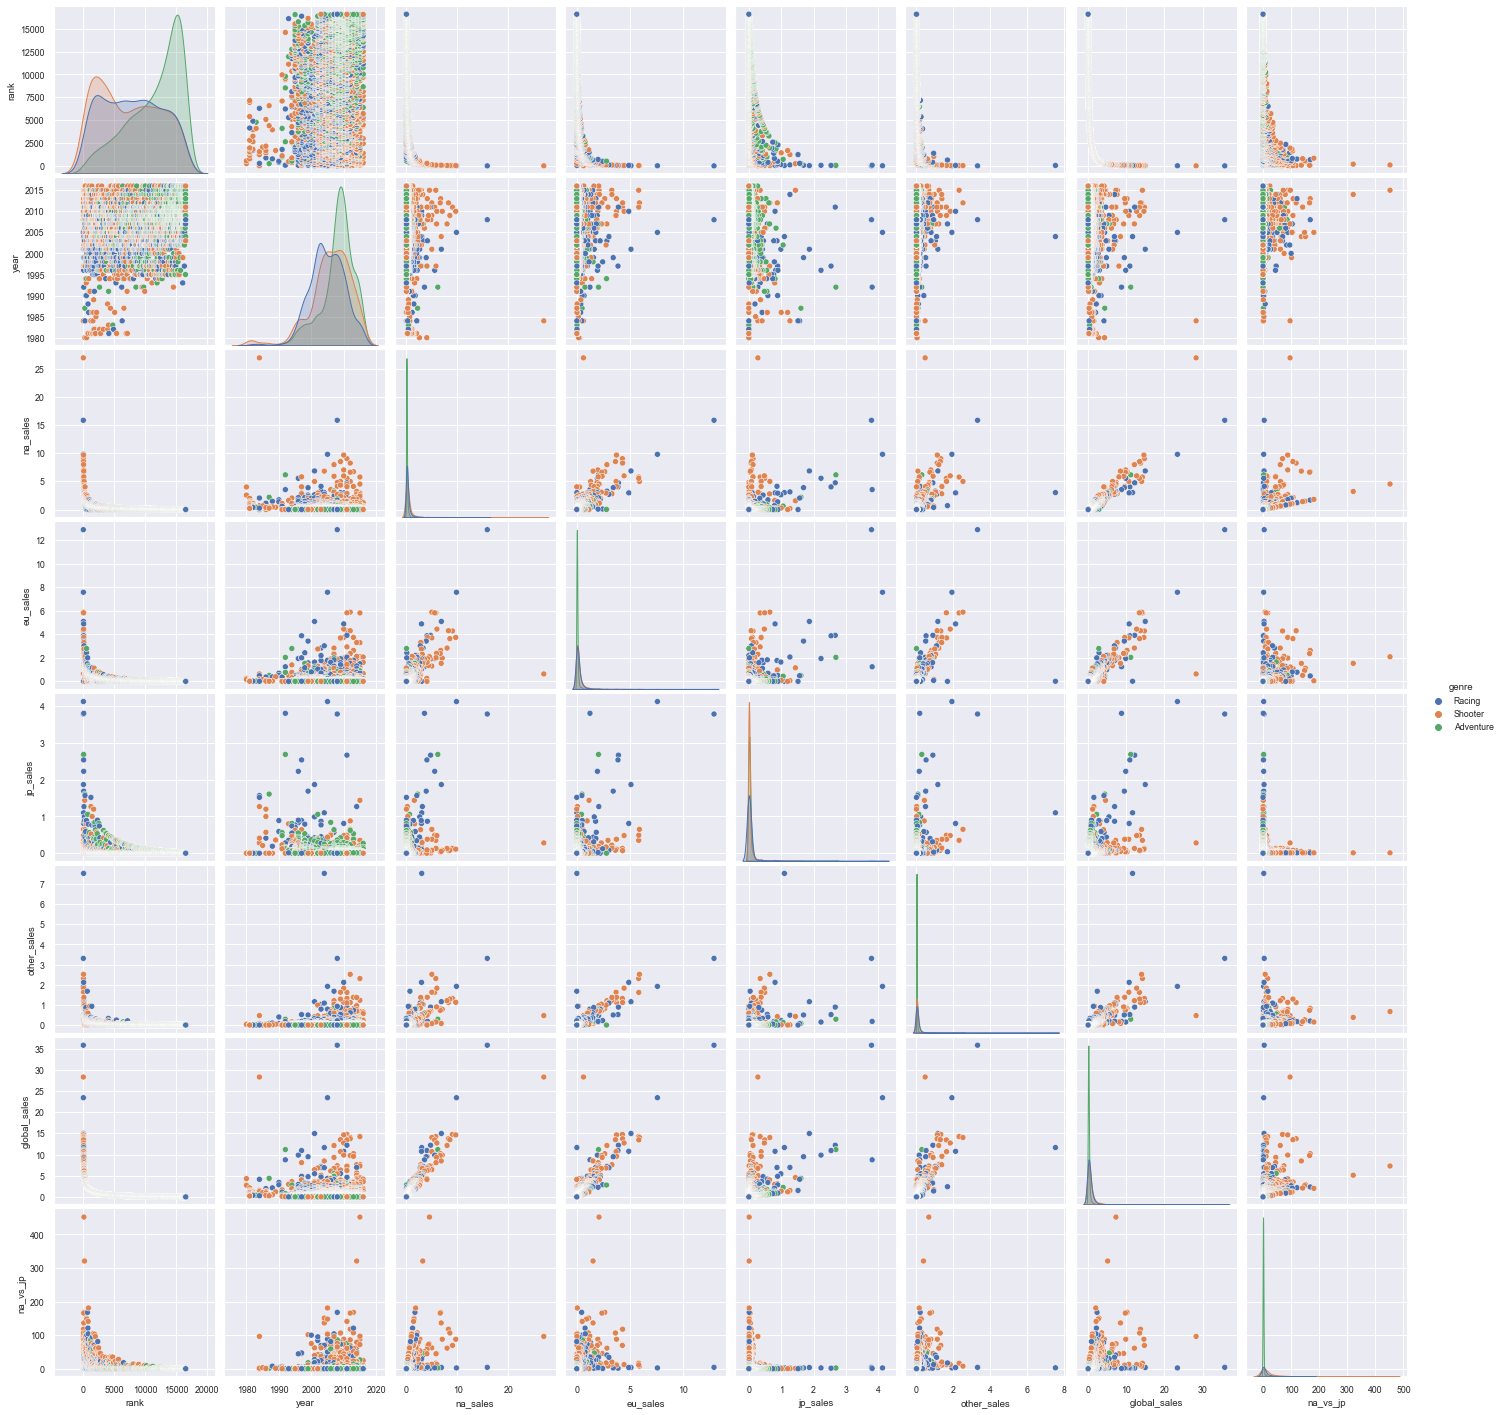

In [195]:
"""
    аргумент [hue] подсвечивает указанную категорию другим цветом.
"""
sns.pairplot(df_new,hue='genre')

#### Диаграмма рассеяния

Диаграмма рассеяния показывает взаимосвязь между двумя числовыми признаками с помощью точек, показывающих движение этих переменных вместе.

Построим диаграмму популярных жанров в Америке и в Азии в зависимости от года выпуска игр 

Text(0, 0.5, 'NA_sales')

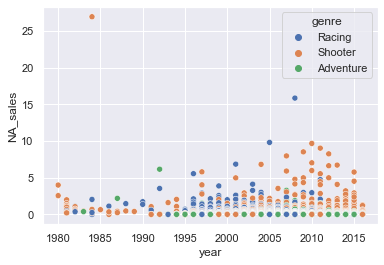

In [196]:
sns.set(font_scale=1.0)
sns.scatterplot(
    x='year',
    y='na_sales',
    data=df_new,
    hue='genre')
plt.xlabel(
    'year')
plt.ylabel(
    'NA_sales')

Text(0, 0.5, 'JP_sales')

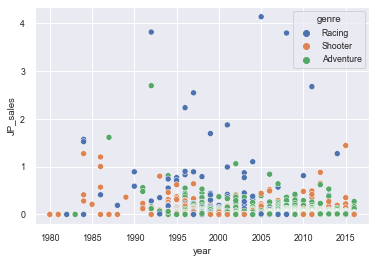

In [197]:
sns.set(font_scale=0.8)
sns.scatterplot(
    x='year',
    y='jp_sales',
    data=df_new,
    hue='genre')
plt.xlabel(
    'year')
plt.ylabel(
    'JP_sales')

Из данных двух графиков видно, что в Америке и в Японии отдавали предпочтения разным играм в разный период времени. Например, в Америке в период с 2010 по 2015 год были наиболее популярны шутеры, в то время как в Японии за тот же период лучше всего продавались приключенческие игры. (Таким образом, можно подтвердить устоявшееся мнение, что Азиатская аудитория меньше играет в шутеры, чем остальной мир, а вот жанр "приключения" был всегда довольно популярен) 

#### Кластеризация данных

Кластеризация - это разбиение элементов некоторого множества на группы в зависимости от их схожести.
Кластеризация данных включает в себя следующие этапы:
1. Выделение характеристик.
Выюерем свойства, которые характеризуют наши объекты. Ими могут быть количественные характеристики (количество продаж), качественные характеристики (жанр, платформа, издатель).
2. Определение метрики
Следующим этапом кластеризации является выбор метрики, по которой мы будем определять длизость объектов.
Метрика выбирается в зависимости от:
    1. пространства, в котором расположены объекты
    2. неявных характеристик кластеров
3. Разбиение объектов на группы
4. Представление результатов

#### Алгоритм kMeans

Наиболее простой, но в то же время достаточно неточный метод кластеризации в классической реализации. Он разбивает множество элементов векторного пространства на заранее известное число кластеров k. Действие алгоритма таково, что он стремится минимизировать среднеквадратичное отклонение на точках каждого кластера. Основная идея заключается в том, что на каждой итерации перевычисляется центр масс для каждого кластера, полученного на предыдущем шаге, затем векторы разбиваются на кластеры вновь в соответствии с тем, какой из новых центров оказался ближе по выбранной метрике. Алгоритм завершается, когда на какой-то итерации не происходит изменения кластеров.

##### Нормализация данных
Изменим значения числовых столбцов в наборе данных для использования общей шкалы без искажения различий в диапазонах значений или потери информации.

In [198]:
from sklearn import preprocessing

In [200]:
# Избавимся от столбцов, содержащих НЕ числа
# axis=1 - по всем строкам

numeric_attrs = ['rank','year','na_sales','eu_sales','jp_sales','other_sales','global_sales']
df_numeric = df.filter(numeric_attrs, axis=1)
print(f"Размер df_numeric = {df_numeric.shape}")
df_numeric.head()

Размер df_numeric = (16327, 7)


,rank,year,na_sales,eu_sales,jp_sales,other_sales,global_sales
0,1,2006.0,41.49,29.02,3.77,8.46,82.74
1,2,1985.0,29.08,3.58,6.81,0.77,40.24
2,3,2008.0,15.85,12.88,3.79,3.31,35.82
3,4,2009.0,15.75,11.01,3.28,2.96,33.00
4,5,1996.0,11.27,8.89,10.22,1.00,31.37


In [201]:
minmax_processed = preprocessing.MinMaxScaler().fit_transform(df_numeric)

df_numeric_scaled = pd.DataFrame(minmax_processed, index=df_numeric.index, columns=numeric_attrs)
df_numeric_scaled.head()

,rank,year,na_sales,eu_sales,jp_sales,other_sales,global_sales
0,0.000000,0.650,1.000000,1.000000,0.368885,0.800378,1.000000
1,0.000060,0.125,0.700892,0.123363,0.666341,0.072848,0.486281
2,0.000120,0.700,0.382020,0.443832,0.370841,0.313150,0.432854
3,0.000181,0.725,0.379610,0.379394,0.320939,0.280038,0.398767
4,0.000241,0.400,0.271632,0.306340,1.000000,0.094607,0.379064


##### Применение kMeans
Существует несколько методов определения количества кластеров. Воспользуемся Elbow method.

In [202]:
from sklearn.cluster import KMeans

In [203]:
Nc = range(1, 20)
kmeans = [KMeans(n_clusters=i) for i in Nc]
score = [kmeans[i].fit(df_numeric_scaled).score(df_numeric_scaled) for i in range(len(kmeans))]

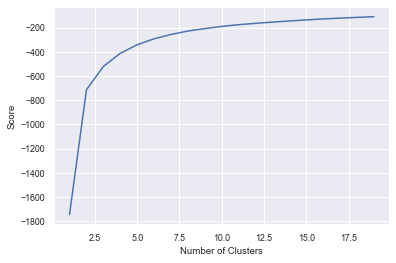

In [205]:
plt.plot(Nc,score)
plt.xlabel('Number of Clusters')
plt.ylabel('Score')
plt.show()

In [206]:
kmeans = KMeans(n_clusters=15)
kmeans.fit(df_numeric_scaled)

KMeans(n_clusters=15)

In [207]:
print(f"kmeans.labels_ = {kmeans.labels_}")
print(f"kmeans.cluster_centers_ = {kmeans.cluster_centers_}")
print(f"kmeans = {kmeans}")

kmeans.labels_ = [ 2  2  2 ... 13 13 13]
kmeans.cluster_centers_ = [[2.67176121e-01 7.54243281e-01 5.49850461e-03 4.47333303e-03
  4.57612857e-03 4.90432879e-03 5.39843403e-03]
 [7.52766417e-01 6.73282695e-01 7.82127316e-04 3.55514850e-04
  1.42247051e-03 3.00569019e-04 6.23137673e-04]
 [3.23388429e-03 6.04245283e-01 1.84409064e-01 1.64434417e-01
  3.60170587e-01 1.44517235e-01 2.13000235e-01]
 [3.12450600e-01 5.89768413e-01 5.16394524e-03 2.90010241e-03
  5.25344472e-03 2.45102793e-03 4.44714035e-03]
 [4.49638980e-01 7.57673589e-01 2.57710473e-03 1.63395112e-03
  3.77102829e-03 1.82891229e-03 2.44323085e-03]
 [8.96251022e-01 8.20642857e-01 1.00024102e-04 2.30875258e-04
  1.43765725e-03 7.83889715e-05 2.06092107e-04]
 [7.53697097e-01 4.55722154e-01 5.76446581e-04 4.39489248e-04
  2.33779734e-03 2.18859176e-04 6.44470125e-04]
 [6.42029727e-01 7.87068332e-01 1.08504143e-03 6.76267248e-04
  2.76287581e-03 7.79242265e-04 1.09462605e-03]
 [1.16722185e-01 4.42256637e-01 1.96330799e-02 1.3851

In [208]:
df_numeric['cluster'] = kmeans.labels_
df_numeric.head()

,rank,year,na_sales,eu_sales,jp_sales,other_sales,global_sales,cluster
0,1,2006.0,41.49,29.02,3.77,8.46,82.74,2
1,2,1985.0,29.08,3.58,6.81,0.77,40.24,2
2,3,2008.0,15.85,12.88,3.79,3.31,35.82,2
3,4,2009.0,15.75,11.01,3.28,2.96,33.00,2
4,5,1996.0,11.27,8.89,10.22,1.00,31.37,2


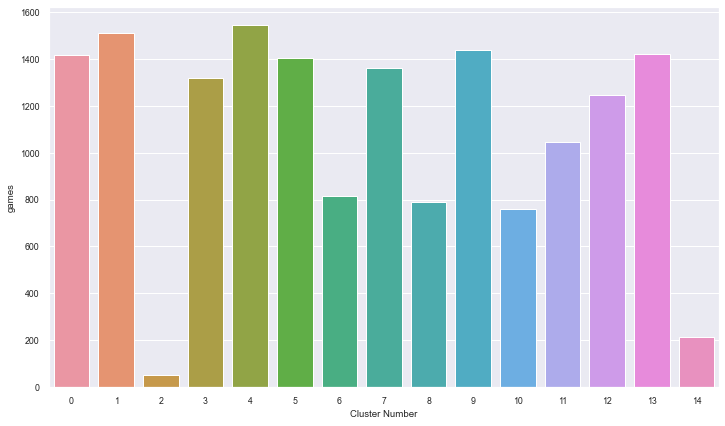

In [210]:
plt.figure(figsize=(12,7))
axis = sns.barplot(x=np.arange(0,15,1),y=df_numeric.groupby(['cluster']).count()['rank'].values)
x=axis.set_xlabel("Cluster Number")
y=axis.set_ylabel("games")

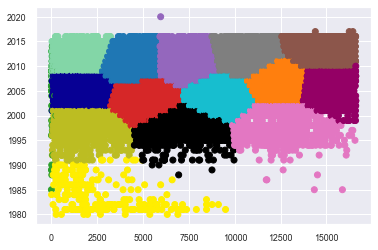

In [211]:
import matplotlib.pyplot as plt
import matplotlib.colors as colors

labels = kmeans.labels_

LABEL_COLOR_MAP = {0 :'#1f77b4',
                   1 :'#ff7f0e',
                   2 :'#2ca02c',
                   3 :'#d62728',
                   4 :'#9467bd',
                   5 :'#8c564b',
                   6 :'#e377c2',
                   7 :'#7f7f7f',
                   8 :'#bcbd22',
                   9 :'#17becf',
                   10 :'#000000',
                   11 :'#83d6a7',
                   12 :'#070094',
                   13 :'#940065',
                   14 :'#ffee00'}

label_color = [LABEL_COLOR_MAP[l] for l in labels]

plt.scatter(df_numeric.iloc[:,0], df_numeric.iloc[:,1], c=label_color)
plt.show()